In [19]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import matplotlib.patches as mpatches
import plot_utils
import scipy

In [20]:
df_eval = pd.read_csv("EVAL_RESULTS_13Jan2023.csv")
df_test = pd.read_csv("TEST_RESULTS_13Jan2023.csv")
df_eval['PR'] = df_eval.loc[:, "Non-embedding parameters"].values / df_eval.loc[:, "Embedding parameters"].values

In [21]:
np.percentile(df_eval.loc[:, 'Total parameters'].values, [25, 50, 75, 100])

array([ 2618498.,  6004354., 11304258., 18545730.])

In [22]:
np.percentile(df_eval.loc[:, 'Total parameters'].values, [25, 50, 75, 100])

array([ 2618498.,  6004354., 11304258., 18545730.])

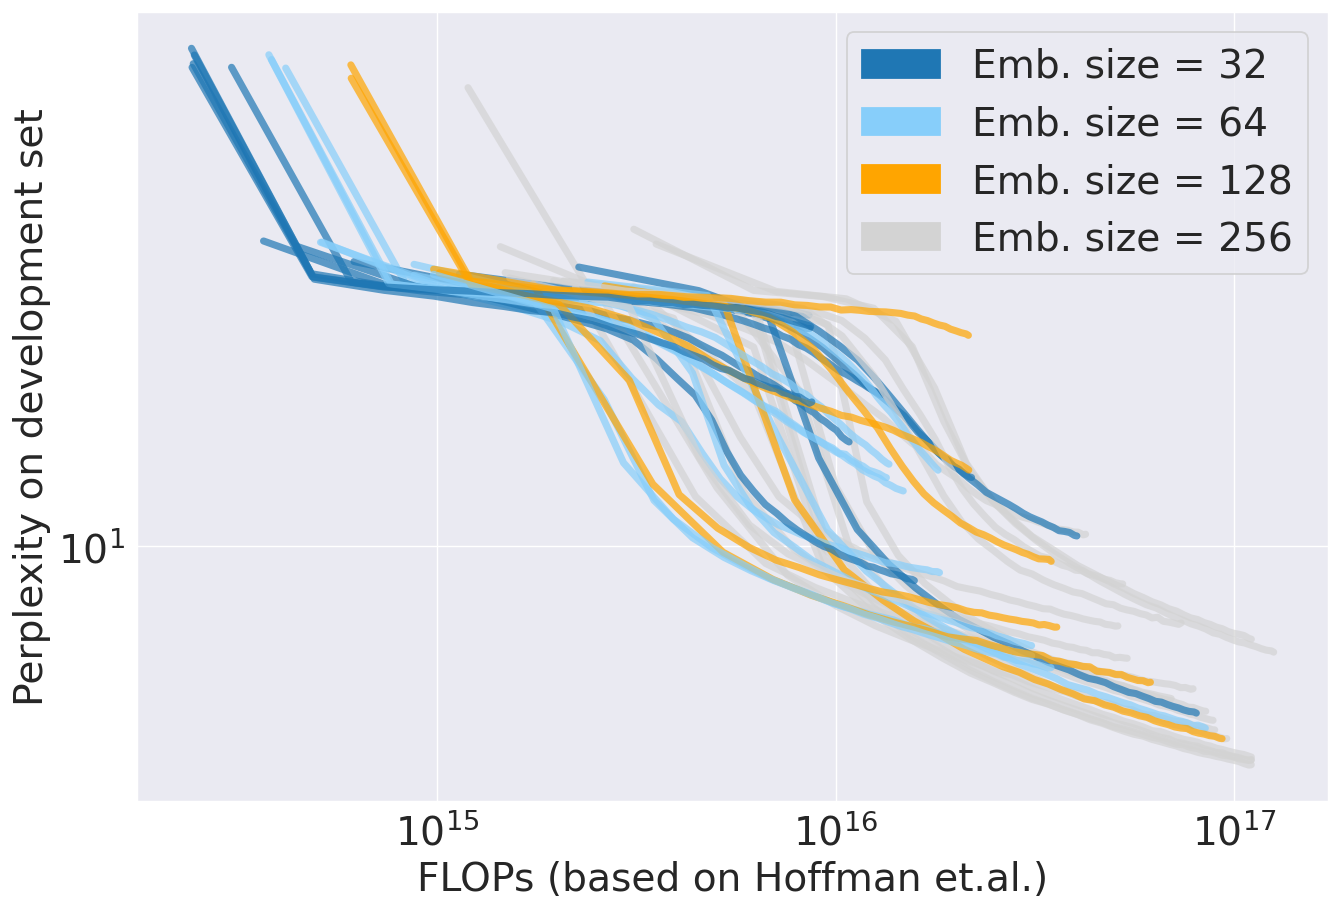

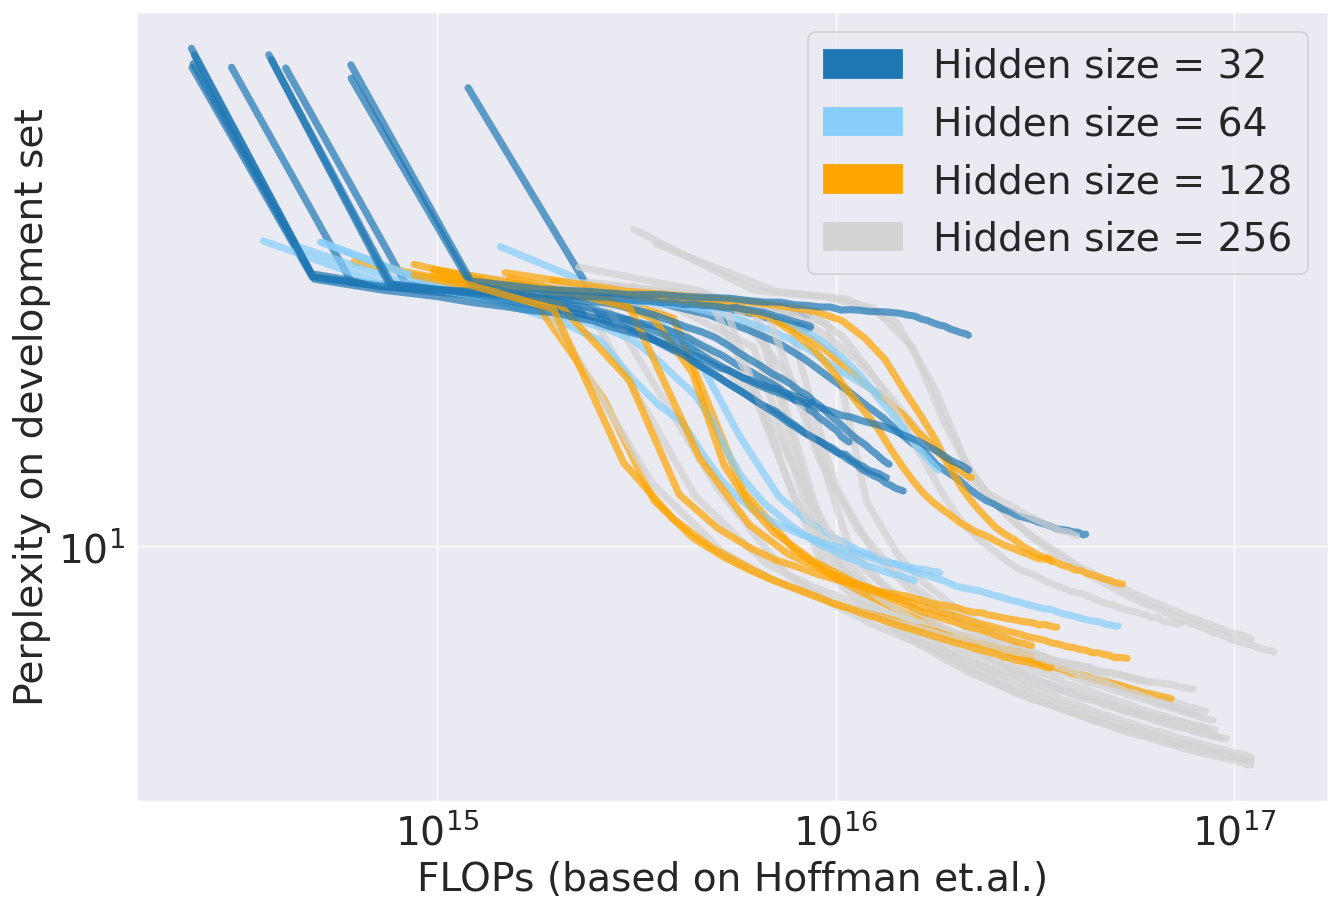

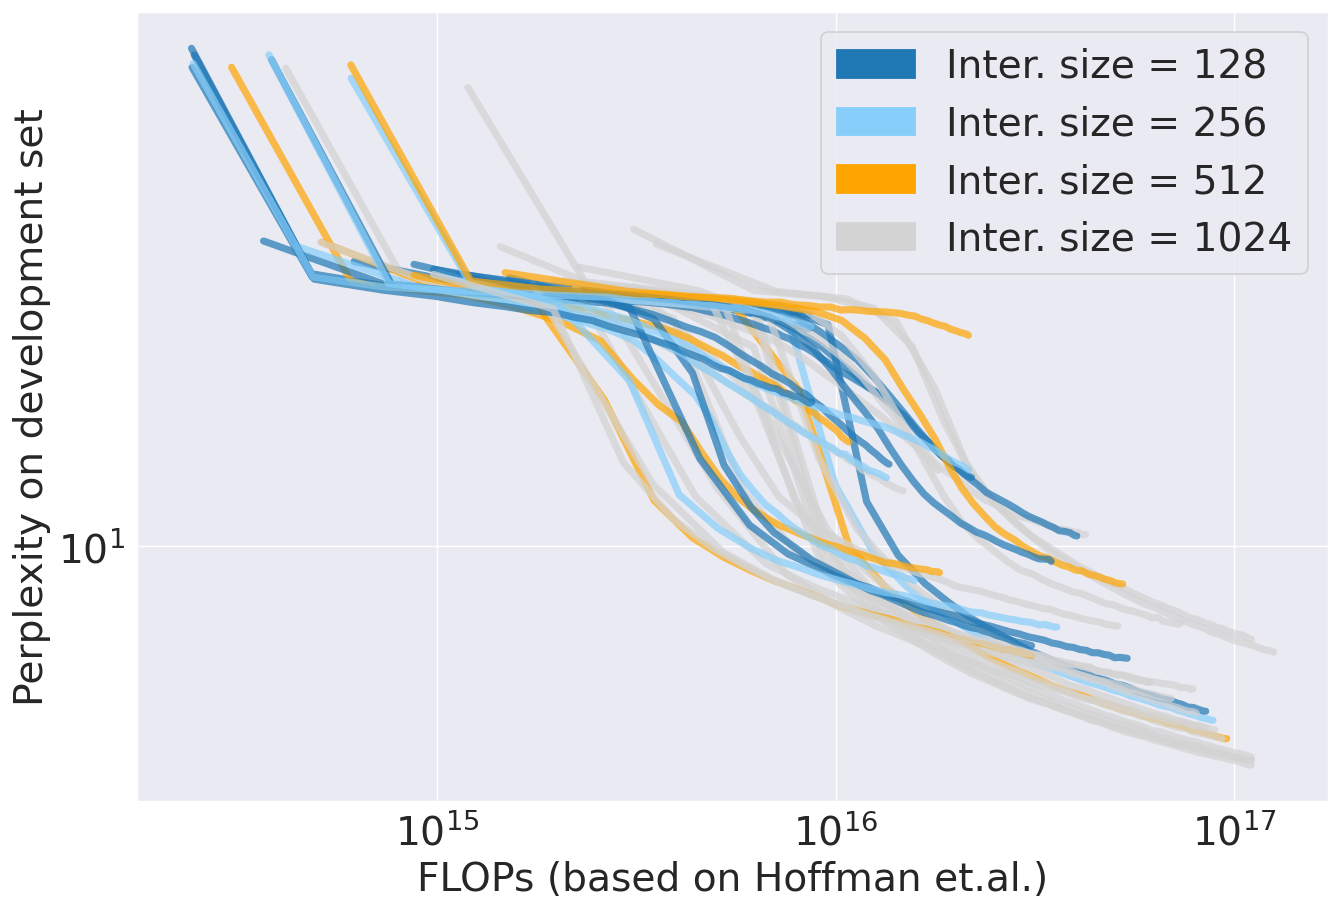

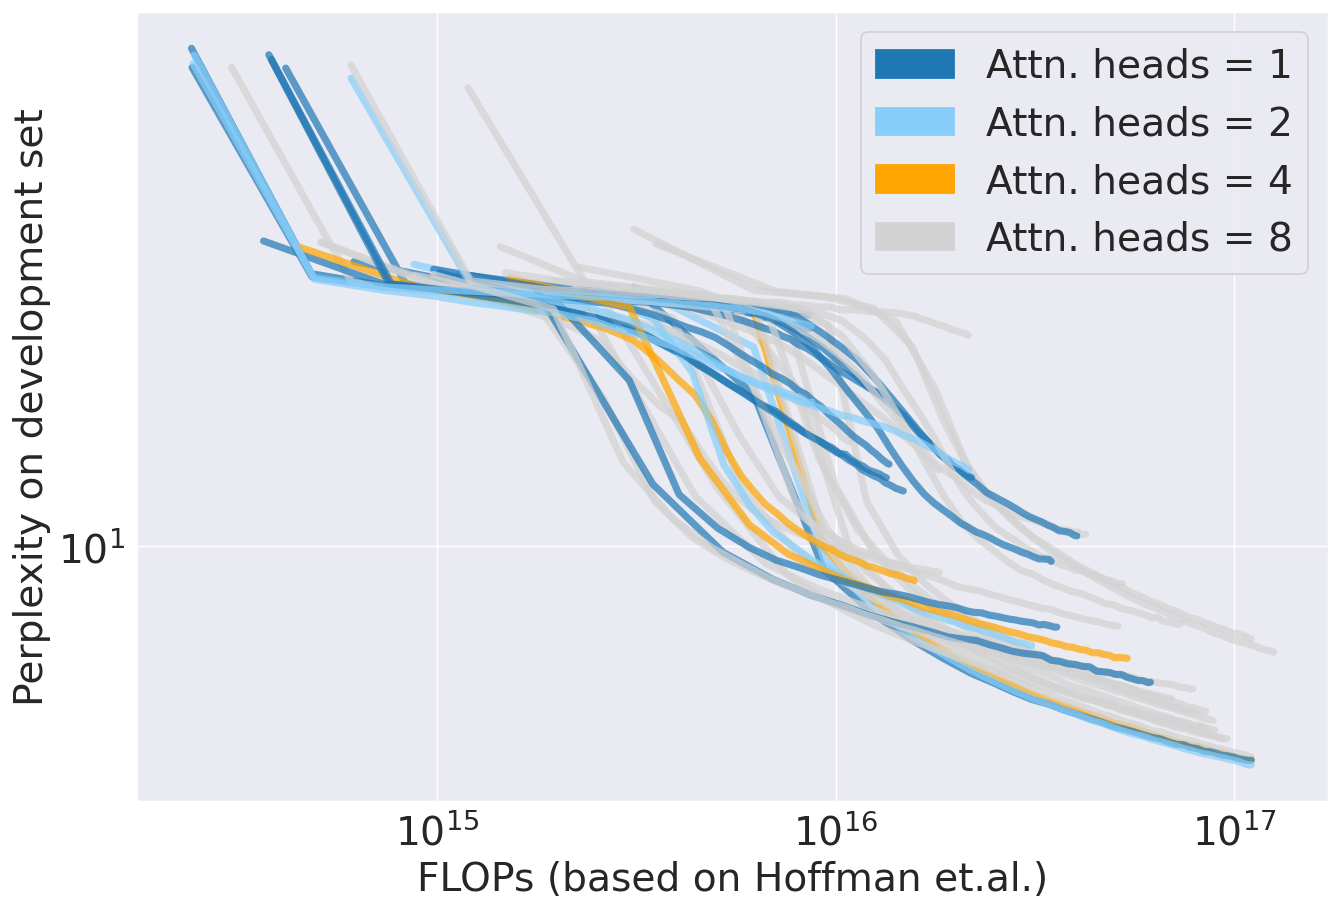

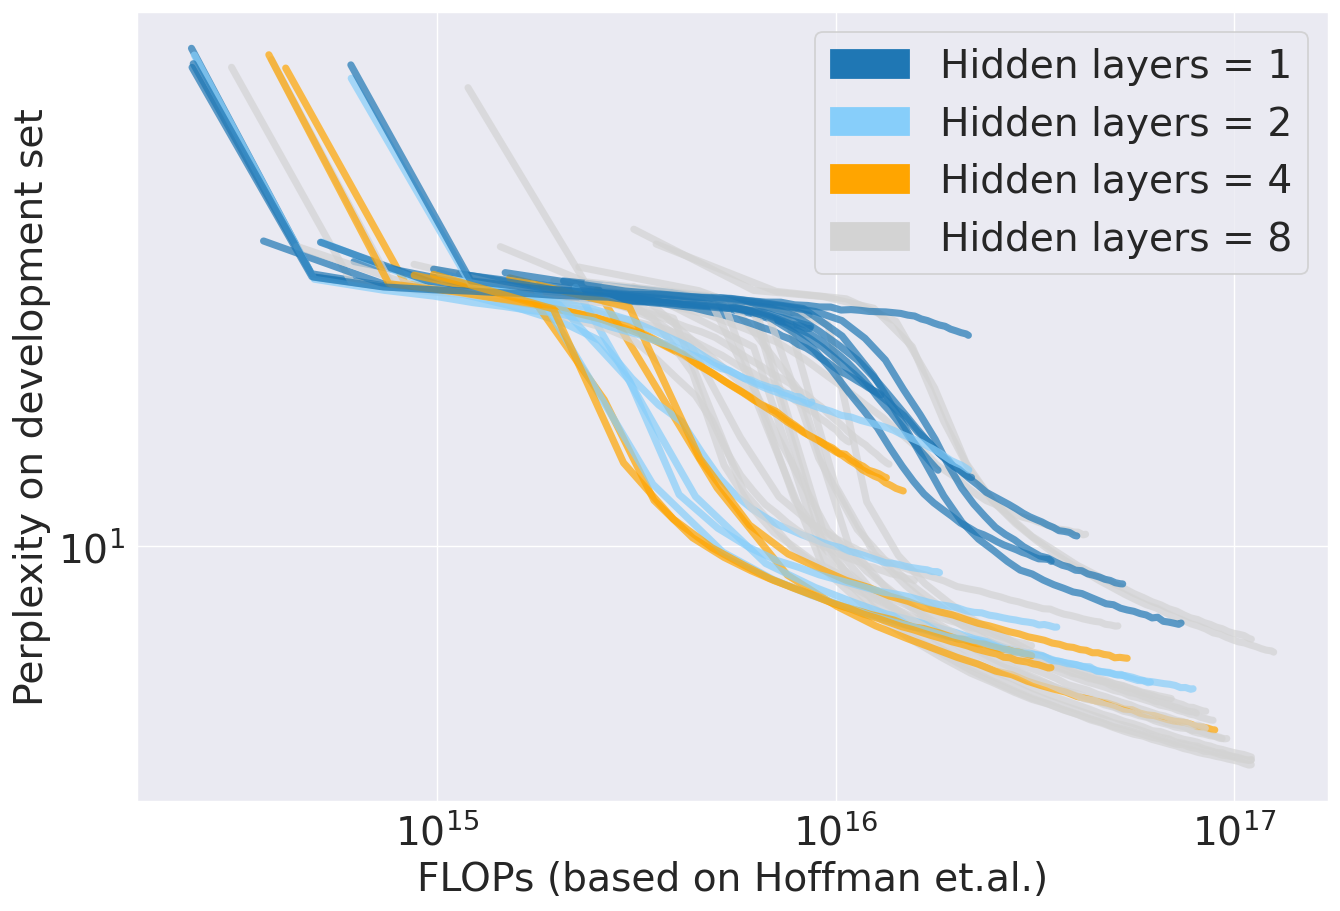

In [23]:
feat2vals = {
    "embedding_size": [32, 64, 128, 256],
    "hidden_size": [32, 64, 128, 256],
    "intermediate_size": [128, 256, 512, 1024],
    "num_attention_heads": [1, 2, 4, 8],
    "num_hidden_layers": [1, 2, 4, 8],
}

for feat in ["embedding_size", "hidden_size", "intermediate_size", "num_attention_heads", "num_hidden_layers"]:
    plot_utils.plot_ppl_flops_model_config_feature(
        df_eval,
        config_feature=feat,
        config_feature_vals=feat2vals[feat],
    )

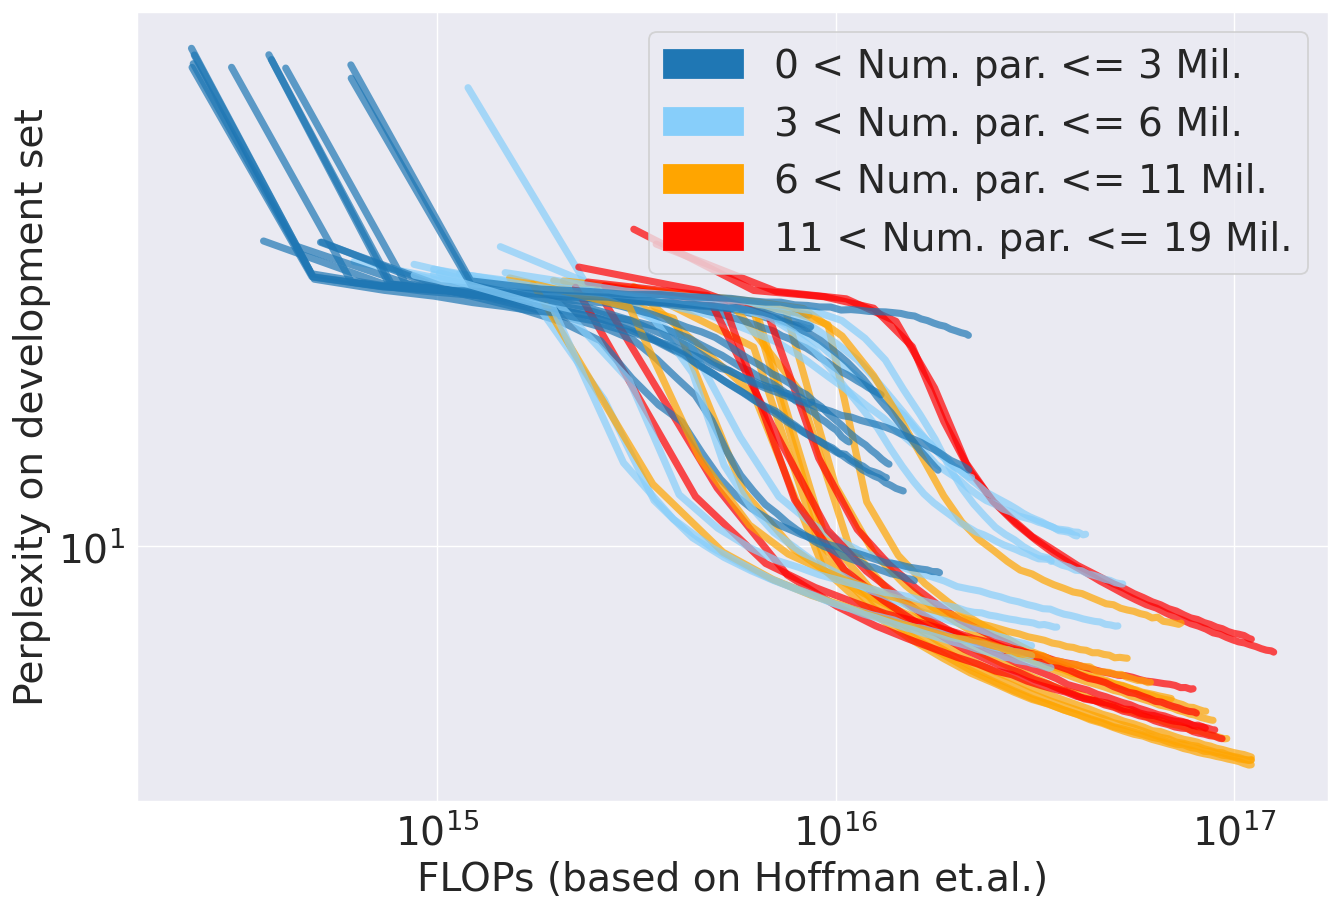

In [6]:
plot_utils.plot_ppl_flops_model_size(
    df_eval=df_eval,
)

In [24]:
df_eval = df_eval.reset_index(drop=True)

In [25]:
df_eval

,Unnamed: 0,Unnamed: 0.1,eval/perplexity,eval/loss,eval/step,eval/epoch,eval/batch_idx,eval/updates,test/perplexity,test/loss,...,intermediate_size,num_attention_heads,num_hidden_layers,Experiment type,FLOPS Hoffman per sequence,FLOPS Hoffman total,FLOPS Kaplan per sequence,FLOPS Kaplan total,Tokens,PR
0,0,0,30.264049,3.409961,2000,0,1999,1000,7.22978,1.978209,...,1024.0,8.0,8.0,Model Config,1.216532e+10,3.114321e+15,8.706246e+09,2.228799e+15,3.276800e+07,2.313114
1,1,1,24.438904,3.196176,4000,0,3999,2000,7.22978,1.978209,...,1024.0,8.0,8.0,Model Config,1.216532e+10,6.228642e+15,8.706246e+09,4.457598e+15,6.553600e+07,2.313114
2,2,2,23.912214,3.174389,6000,0,5999,3000,7.22978,1.978209,...,1024.0,8.0,8.0,Model Config,1.216532e+10,9.342963e+15,8.706246e+09,6.686397e+15,9.830400e+07,2.313114
3,3,3,22.969849,3.134182,8000,0,7999,4000,7.22978,1.978209,...,1024.0,8.0,8.0,Model Config,1.216532e+10,1.245728e+16,8.706246e+09,8.915196e+15,1.310720e+08,2.313114
4,4,4,20.084402,2.999943,10000,0,9999,5000,7.22978,1.978209,...,1024.0,8.0,8.0,Model Config,1.216532e+10,1.557161e+16,8.706246e+09,1.114400e+16,1.638400e+08,2.313114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,103,103,6.635881,1.892491,64000,0,63999,32000,6.56835,1.882263,...,1024.0,8.0,4.0,Iso-FLOPs,3.820782e+09,3.129984e+16,2.916141e+09,2.388902e+16,1.048576e+09,3.099093
1508,104,104,6.614809,1.889311,66000,0,65999,33000,6.56835,1.882263,...,1024.0,8.0,4.0,Iso-FLOPs,3.820782e+09,3.227796e+16,2.916141e+09,2.463556e+16,1.081344e+09,3.099093
1509,105,105,6.576316,1.883475,68000,0,67999,34000,6.56835,1.882263,...,1024.0,8.0,4.0,Iso-FLOPs,3.820782e+09,3.325608e+16,2.916141e+09,2.538209e+16,1.114112e+09,3.099093
1510,106,106,6.538039,1.877637,70000,0,69999,35000,6.56835,1.882263,...,1024.0,8.0,4.0,Iso-FLOPs,3.820782e+09,3.423420e+16,2.916141e+09,2.612862e+16,1.146880e+09,3.099093


In [26]:
df_eval.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'eval/perplexity', 'eval/loss',
       'eval/step', 'eval/epoch', 'eval/batch_idx', 'eval/updates',
       'test/perplexity', 'test/loss', 'Embedding parameters',
       'Non-embedding parameters', 'Total parameters', 'run_name',
       'embedding_size', 'hidden_size', 'intermediate_size',
       'num_attention_heads', 'num_hidden_layers', 'Experiment type',
       'FLOPS Hoffman per sequence', 'FLOPS Hoffman total',
       'FLOPS Kaplan per sequence', 'FLOPS Kaplan total', 'Tokens', 'PR'],
      dtype='object')

In [31]:
bin_ub = np.percentile(sorted(df_eval.loc[:, 'FLOPS Hoffman total'].values / 10**14), [i for i in range(0, 101, 5)])

In [32]:
print(bin_ub)

[   2.41654825   17.49538151   30.39323121   43.74147367   57.5599773
   70.07628165   83.36501323   99.63293167  119.54244551  139.87617964
  167.00028223  200.73306233  243.16024455  288.58708604  341.5255485
  404.74396066  489.04735713  588.28665756  702.51010484  841.12126142
 1256.97118458]


In [33]:
bin_ub_new = []
prev_ub = 0
for ub_idx, ub_i in enumerate(bin_ub):
    if ub_idx in [0, 1, 2]:
        step_ = ((ub_i - prev_ub) / 5) if ub_idx == 2 else ((ub_i - prev_ub) / 10)
        bin_ub_new += list(np.arange(prev_ub, ub_i, step_))
    
    if ub_idx == 2:
        bin_ub_new.append(ub_i)
    
    prev_ub = ub_i
    

#
bin_ub_new = list(bin_ub_new) + list(bin_ub[2:])
print(bin_ub_new)

#
bin_ub = bin_ub_new

[0.0, 0.24165482496, 0.48330964992, 0.7249644748799999, 0.96661929984, 1.2082741248, 1.4499289497599999, 1.69158377472, 1.93323859968, 2.17489342464, 2.4165482496, 3.9244315754495998, 5.4323149012992, 6.9401982271488, 8.4480815529984, 9.955964878847999, 11.4638482046976, 12.9717315305472, 14.479614856396799, 15.987498182246398, 17.495381508096, 20.0749514489856, 22.654521389875203, 25.234091330764805, 27.813661271654407, 30.393231212544002, 30.393231212544002, 43.74147366912, 57.559977295871995, 70.0762816512, 83.365013225472, 99.63293166796802, 119.54244550656, 139.87617964032, 167.00028223488, 200.73306233241604, 243.16024455168002, 288.587086036992, 341.52554849894403, 404.74396065792, 489.047357128704, 588.2866575605759, 702.510104838144, 841.121261420544, 1256.9711845834752]


In [34]:
(df_eval.loc[:, 'FLOPS Hoffman total'].values.max() - df_eval.loc[:, 'FLOPS Hoffman total'].values.min()) / (20 * 10**14)

62.72773181669376

In [35]:
df_eval["FLOP bins"] = -1
for val_idx, val in enumerate(df_eval.loc[:, 'FLOPS Hoffman total'].values):
    val = val / 10**14
    ub_prev = 0
    for ub_idx, ub_ in enumerate(bin_ub[1:]):
        if ub_prev < val <= ub_:
            df_eval.loc[val_idx, "FLOP bins"] = ub_idx
            break
        else:
            ub_prev = ub_
    
df_eval["FLOP bins"] = df_eval["FLOP bins"].astype(str)

In [36]:
df_eval.groupby(["FLOP bins"]).count()

,Unnamed: 0,Unnamed: 0.1,eval/perplexity,eval/loss,eval/step,eval/epoch,eval/batch_idx,eval/updates,test/perplexity,test/loss,...,intermediate_size,num_attention_heads,num_hidden_layers,Experiment type,FLOPS Hoffman per sequence,FLOPS Hoffman total,FLOPS Kaplan per sequence,FLOPS Kaplan total,Tokens,PR
FLOP bins,,,,,,,,,,,,,,,,,,,,,
10,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
11,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
12,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
13,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
14,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
15,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
16,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
17,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
18,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


In [37]:
arg_min = []
for bin_ in df_eval.groupby(["FLOP bins"]).count().index:
    df_i = df_eval.loc[df_eval.loc[:, 'FLOP bins'] == bin_, :]
    df_i = df_i.sort_values(by=["eval/perplexity"], ascending=True)
    arg_min.append(df_i.index.tolist()[0])

#
df_arg_min = df_eval.loc[arg_min, :]

In [38]:
df_arg_min.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'eval/perplexity', 'eval/loss',
       'eval/step', 'eval/epoch', 'eval/batch_idx', 'eval/updates',
       'test/perplexity', 'test/loss', 'Embedding parameters',
       'Non-embedding parameters', 'Total parameters', 'run_name',
       'embedding_size', 'hidden_size', 'intermediate_size',
       'num_attention_heads', 'num_hidden_layers', 'Experiment type',
       'FLOPS Hoffman per sequence', 'FLOPS Hoffman total',
       'FLOPS Kaplan per sequence', 'FLOPS Kaplan total', 'Tokens', 'PR',
       'FLOP bins'],
      dtype='object')

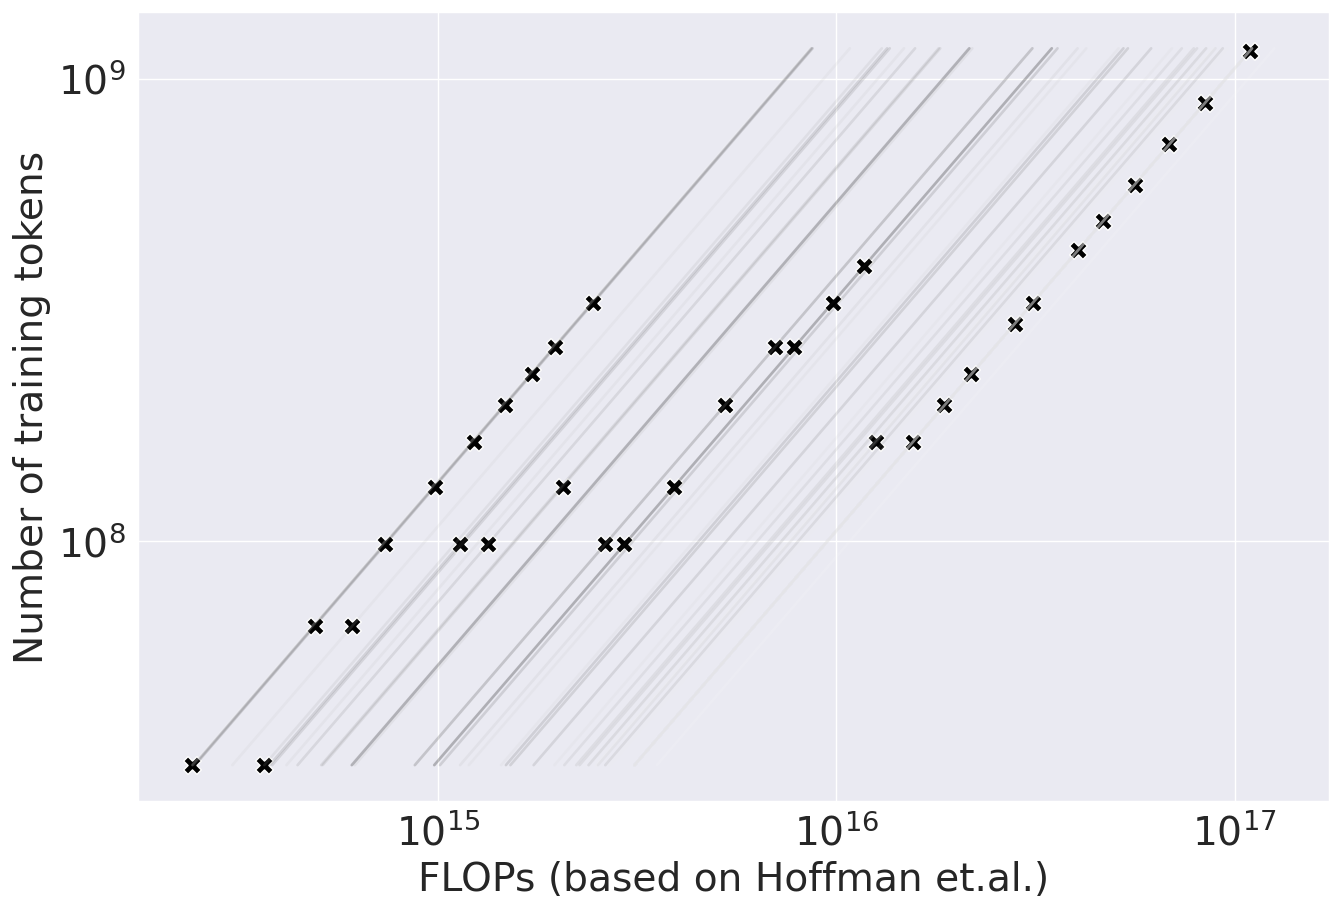

In [39]:
f, ax = plt.subplots(figsize=(12, 8), dpi=128)
#ax.set_ylim(10**7, 10**13)
#ax.set_xlim(10**15, 10**13)
ax.set(xscale="log", yscale="log")
sns.set_style("darkgrid")
sns.scatterplot(
    data=df_arg_min,
    x="FLOPS Hoffman total",
    y="Tokens",
    s=100,
    #linewidth=0,
    marker="X",
    color="black",
    #lw=4,
    #alpha=0.7,
    #ax=ax, 
)
sns.lineplot(
    data=df_eval,
    x="FLOPS Hoffman total",
    y="Tokens",
    hue="run_name",
    palette="Greys",
    #s=10,
    #linewidth=0,
    #marker="X",
    #color="black",
    #lw=4,
    alpha=0.15,
    #ax=ax, 
    legend=False,
)

"""
# calculate linear regression function
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    x=df_arg_min.loc[:, "FLOPS Hoffman total"],
    y=df_arg_min.loc[:, "Tokens"]
)

# plot the regression line on the extended canvas
xlims = ax.get_xlim()
new_x = np.arange(10**15, 10**18, (10**18 - 10**15)/(5 * 10**6))
new_y = intercept + (slope * new_x)
ax.plot(new_x, new_y, color='black', linestyle='--', lw = 2.5)

# draw line for Chinchilla
# calculate linear regression function
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    x=[10**19, 10**23.7],
    y=[10**9.6, 1.4 * 10**12],
)

# plot the regression line on the extended canvas
xlims = ax.get_xlim()
new_x = np.arange(10**20, 10**24, (10**24 - 10**20)/10**6
)
ax.plot(new_x, intercept + slope *  new_x, color='orange', linestyle='--', lw = 2.5)
"""
"""
sns.scatterplot(
    x=[10**23.7],
    y=[1.4 * 10**12],
    marker='*',
    linewidth=0,
    #lw=4,
    alpha=1,
    s=1000,
    ax=ax,
    color="orange"
)
"""
plt.xlabel("FLOPs (based on Hoffman et.al.)")
plt.ylabel("Number of training tokens")

plt.savefig("./PLOTS/Tokens_vs_FLOPs_.jpg")

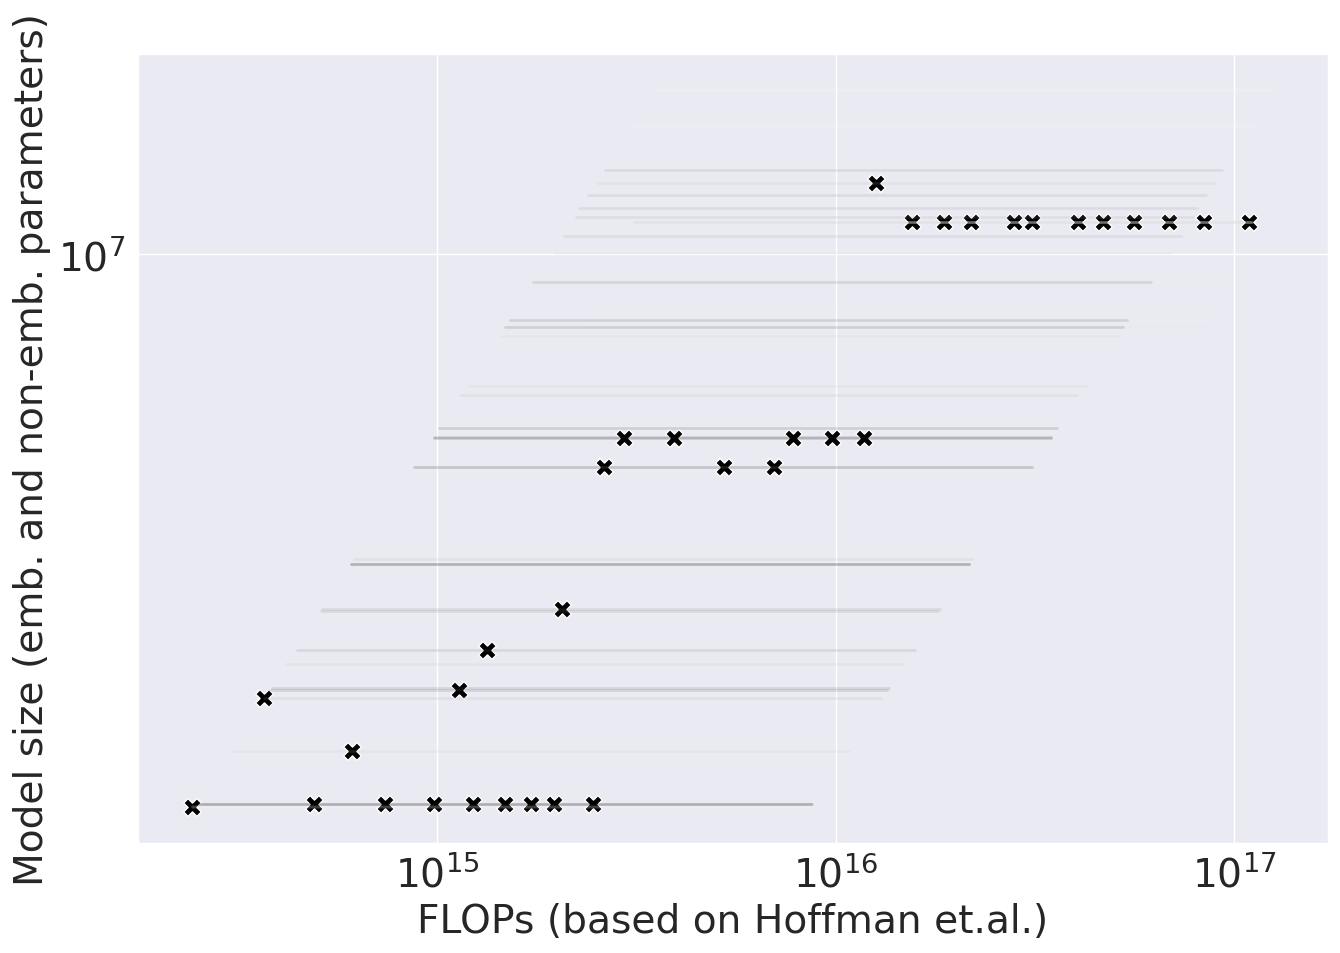

In [40]:
f, ax = plt.subplots(figsize=(12, 8), dpi=128)
#ax.set_ylim(10**7, 10**13)
#ax.set_xlim(10**15, 10**13)
ax.set(xscale="log", yscale="log")
sns.set_style("darkgrid")
sns.scatterplot(
    data=df_arg_min,
    x="FLOPS Hoffman total",
    y="Total parameters",
    s=100,
    #linewidth=0,
    marker="X",
    color="black",
    #lw=4,
    #alpha=0.7,
    #ax=ax, 
)
sns.lineplot(
    data=df_eval,
    x="FLOPS Hoffman total",
    y="Total parameters",
    hue="run_name",
    palette="Greys",
    #s=10,
    #linewidth=0,
    #marker="X",
    #color="black",
    #lw=4,
    alpha=0.15,
    #ax=ax, 
    legend=False,
)

"""
# calculate linear regression function
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    x=df_arg_min.loc[:, "FLOPS Hoffman total"],
    y=df_arg_min.loc[:, "Tokens"]
)

# plot the regression line on the extended canvas
xlims = ax.get_xlim()
new_x = np.arange(10**15, 10**18, (10**18 - 10**15)/(5 * 10**6))
new_y = intercept + (slope * new_x)
ax.plot(new_x, new_y, color='black', linestyle='--', lw = 2.5)

# draw line for Chinchilla
# calculate linear regression function
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    x=[10**19, 10**23.7],
    y=[10**9.6, 1.4 * 10**12],
)

# plot the regression line on the extended canvas
xlims = ax.get_xlim()
new_x = np.arange(10**20, 10**24, (10**24 - 10**20)/10**6
)
ax.plot(new_x, intercept + slope *  new_x, color='orange', linestyle='--', lw = 2.5)
"""
"""
sns.scatterplot(
    x=[10**23.7],
    y=[1.4 * 10**12],
    marker='*',
    linewidth=0,
    #lw=4,
    alpha=1,
    s=1000,
    ax=ax,
    color="orange"
)
"""
plt.xlabel("FLOPs (based on Hoffman et.al.)")
plt.ylabel("Model size (emb. and non-emb. parameters)")

plt.savefig("./PLOTS/Parameters_vs_FLOPs.jpg")

In [41]:
df_eval["PR bins"] = -1
bin_ub = np.percentile(df_eval.PR.values, [0, 25, 50, 75, 100])
for val_idx, val in enumerate(df_eval.loc[:, 'PR'].values):
    ub_prev = 0
    for ub_idx, ub_ in enumerate(bin_ub[1:]):
        if ub_prev < val <= ub_:
            df_eval.loc[val_idx, "PR bins"] = f"{ub_:.2f}"
            break
        else:
            ub_prev = ub_
    
df_eval["PR bins"] = df_eval["PR bins"].astype(float)


#
df_test["PR"] = df_test.loc[:, "Non-embedding parameters"].values / df_test.loc[:, "Embedding parameters"].values
df_test["PR bins"] = -1
for val_idx, val in enumerate(df_test.loc[:, 'PR'].values):
    ub_prev = 0
    for ub_idx, ub_ in enumerate(bin_ub[1:]):
        if ub_prev < val <= ub_:
            df_test.loc[val_idx, "PR bins"] = f"{ub_:.2f}"
            break
        else:
            ub_prev = ub_
    
df_test["PR bins"] = df_test["PR bins"].astype(float)

In [42]:
aaa = df_eval.groupby(["PR bins"]).mean()
bbb = df_test.groupby(["PR bins"]).mean()

In [43]:
df_test.groupby(["PR bins"]).count()

,Unnamed: 0,Unnamed: 0.1,run number,embedding_size,hidden_size,intermediate_size,num_attention_heads,num_hidden_layers,Embedding parameters,Non-embedding parameters,Total parameters,test/perplexity,test/loss,run_name,Experiment type,PR
PR bins,,,,,,,,,,,,,,,,
0.75,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
1.17,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2.67,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
18.41,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


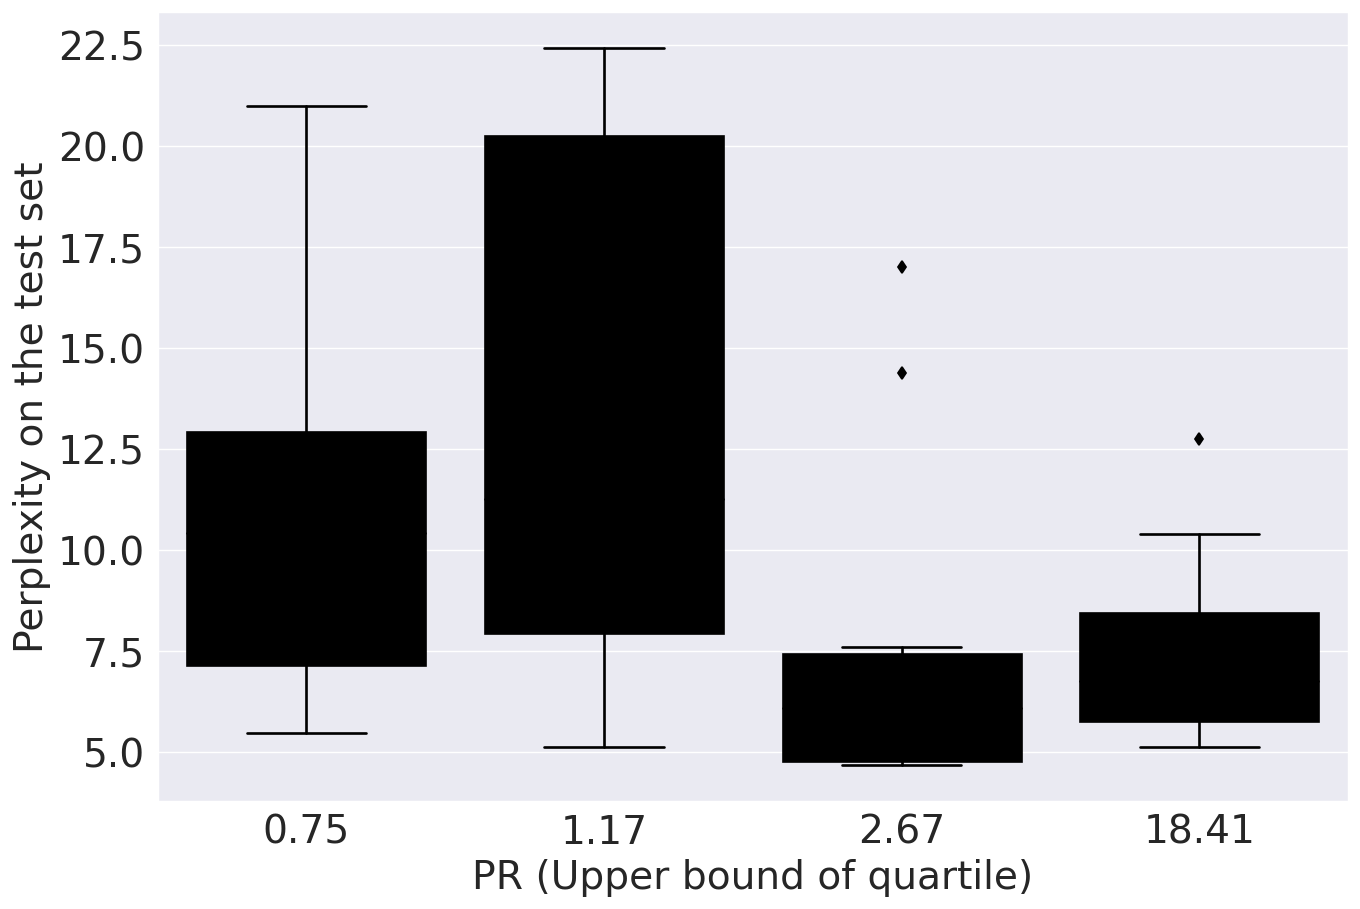

In [44]:
f, ax = plt.subplots(figsize=(12, 8), dpi=128)
#ax.set_ylim(10**7, 10**13)
#ax.set_xlim(10**15, 10**13)
#ax.set(xscale="log", yscale="log")
sns.set_style("darkgrid")
sns.boxplot(
    data=df_test,
    x="PR bins",
    y="test/perplexity",
    showfliers=True,
    #hue="Total parameters",
    #palette="pastel",
    #s=100,
    #linewidth=0,
    #marker="X",
    color="black",
    #lw=4,
    #alpha=0.7,
    #ax=ax, 
    #legend=False,
)


plt.xlabel("PR (Upper bound of quartile)")
plt.ylabel("Perplexity on the test set")

plt.savefig("./PLOTS/PPL_vs_PR_Bin_test.jpg")

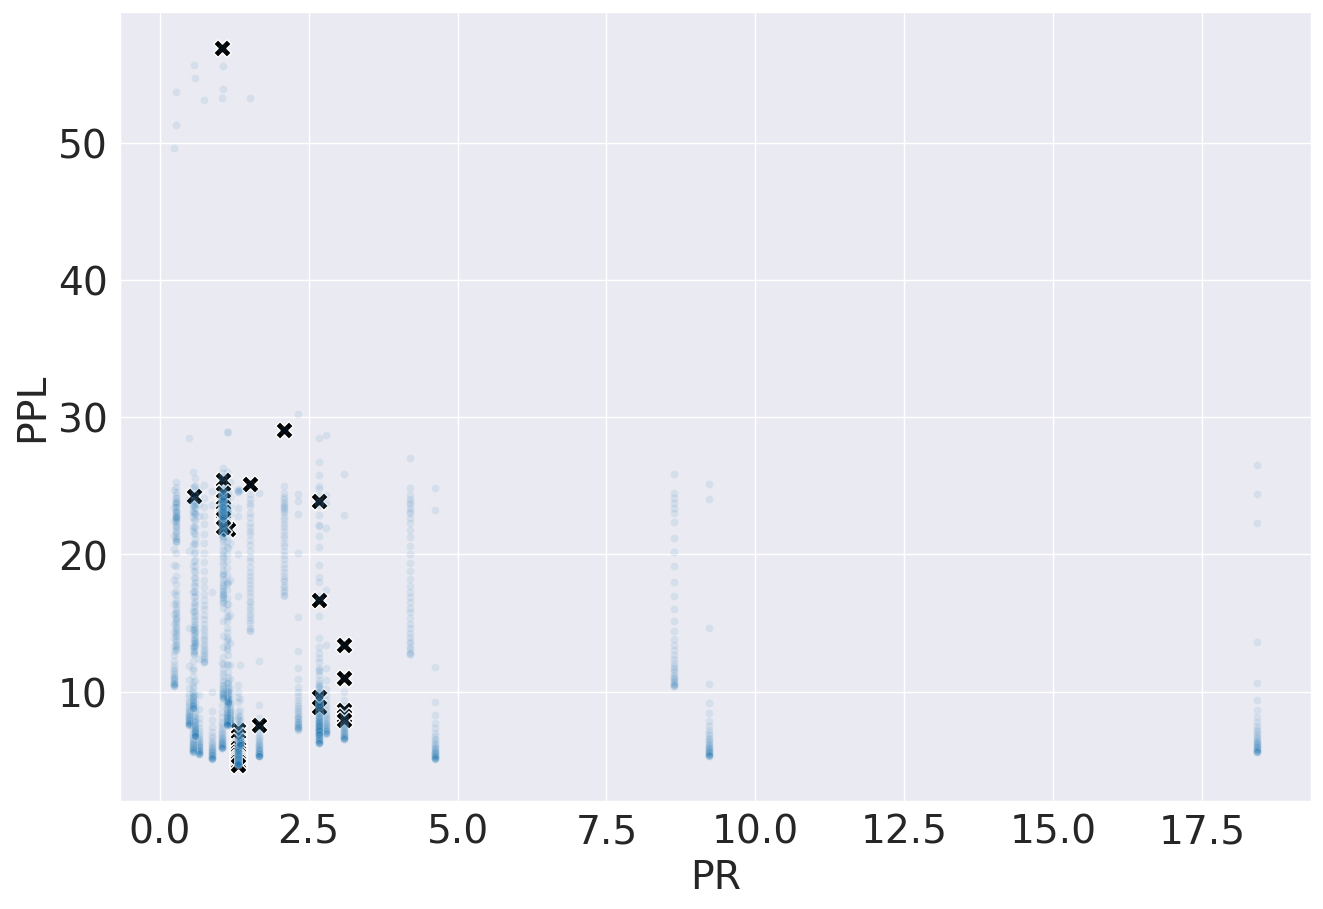

In [45]:
f, ax = plt.subplots(figsize=(12, 8), dpi=128)
#ax.set_ylim(10**7, 10**13)
#ax.set_xlim(10**15, 10**13)
#ax.set(xscale="log", yscale="log")
sns.set_style("darkgrid")
sns.scatterplot(
    data=df_arg_min,
    x="PR",
    y="eval/perplexity",
    #hue="Total parameters",
    #palette="Spectral",
    s=100,
    #linewidth=0,
    marker="X",
    color="black",
    #lw=4,
    #alpha=0.7,
    ax=ax, 
    legend=False,
)
sns.scatterplot(
    data=df_eval,
    x="PR",
    y="eval/perplexity",
    #hue="run_name",
    #palette="Greys",
    s=20,
    #linewidth=0,
    #marker="X",
    #color="black",
    #lw=4,
    alpha=0.1,
    #ax=ax, 
    legend=False,
)


"""
# calculate linear regression function
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    x=df_arg_min.loc[:, "FLOPS Hoffman total"],
    y=df_arg_min.loc[:, "Tokens"]
)

# plot the regression line on the extended canvas
xlims = ax.get_xlim()
new_x = np.arange(10**15, 10**18, (10**18 - 10**15)/(5 * 10**6))
new_y = intercept + (slope * new_x)
ax.plot(new_x, new_y, color='black', linestyle='--', lw = 2.5)

"""

plt.xlabel("PR")
plt.ylabel("PPL")

plt.savefig("./PLOTS/Tokens_vs_Par_.jpg")

Text(0, 0.5, 'Number of training tokens')

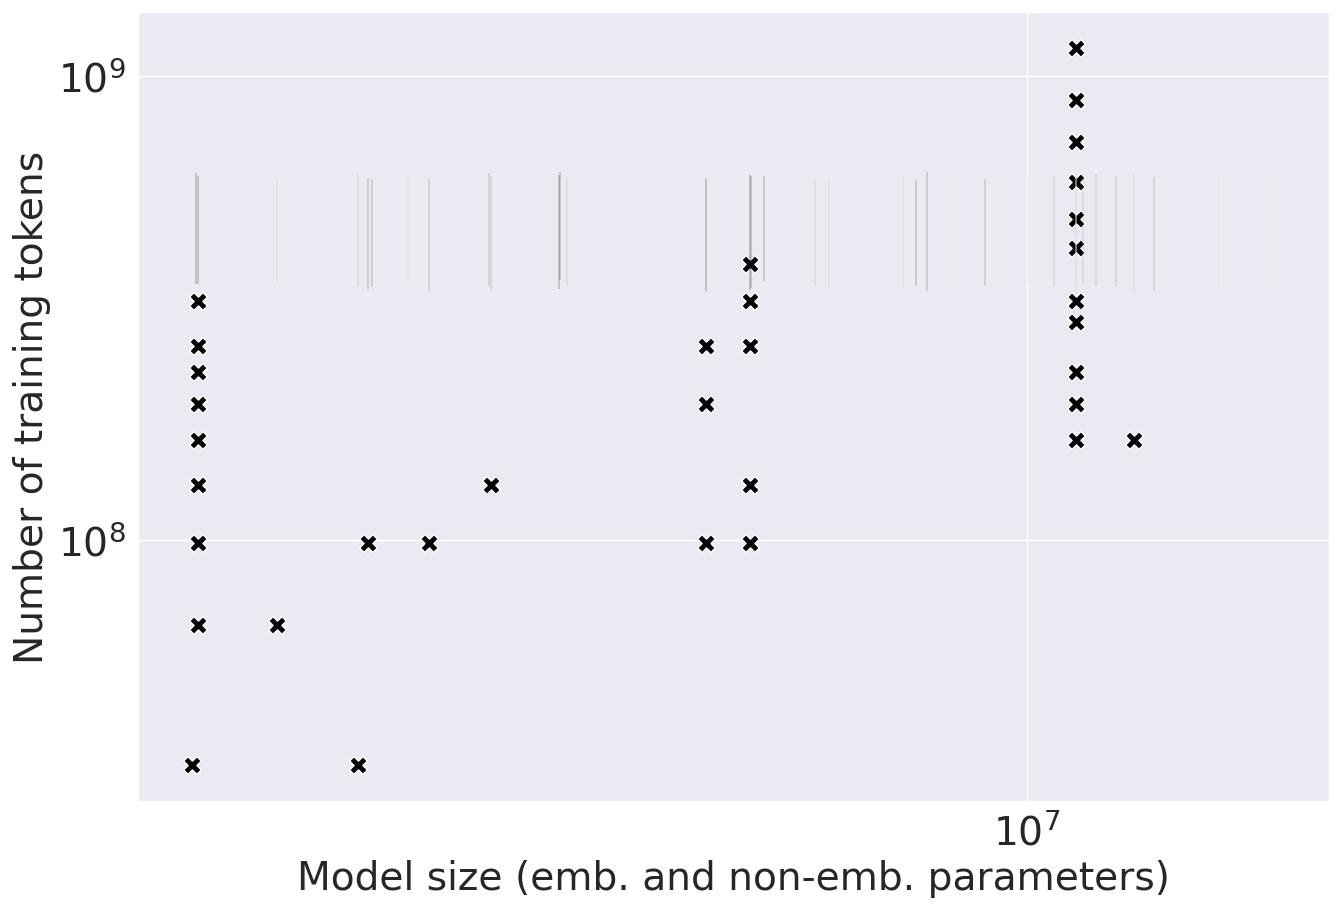

In [46]:
plt.rcParams.update({'font.size': 22})
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(12, 8), dpi=128)
#ax.set_ylim(10**7, 10**13)
#ax.set_xlim(10**15, 10**13)
ax.set(xscale="log", yscale="log")
sns.scatterplot(
    data=df_arg_min,
    x="Total parameters",
    y="Tokens",
    s=100,
    #linewidth=0,
    marker="X",
    color="black",
    #lw=4,
    #alpha=0.7,
    #ax=ax, 
)
sns.lineplot(
    data=df_eval,
    x="Total parameters",
    y="Tokens",
    hue="run_name",
    palette="Greys",
    #s=10,
    #linewidth=0,
    #marker="X",
    #color="black",
    #lw=4,
    alpha=0.15,
    #ax=ax, 
    legend=False,
)

plt.xlabel("Model size (emb. and non-emb. parameters)")
plt.ylabel("Number of training tokens")

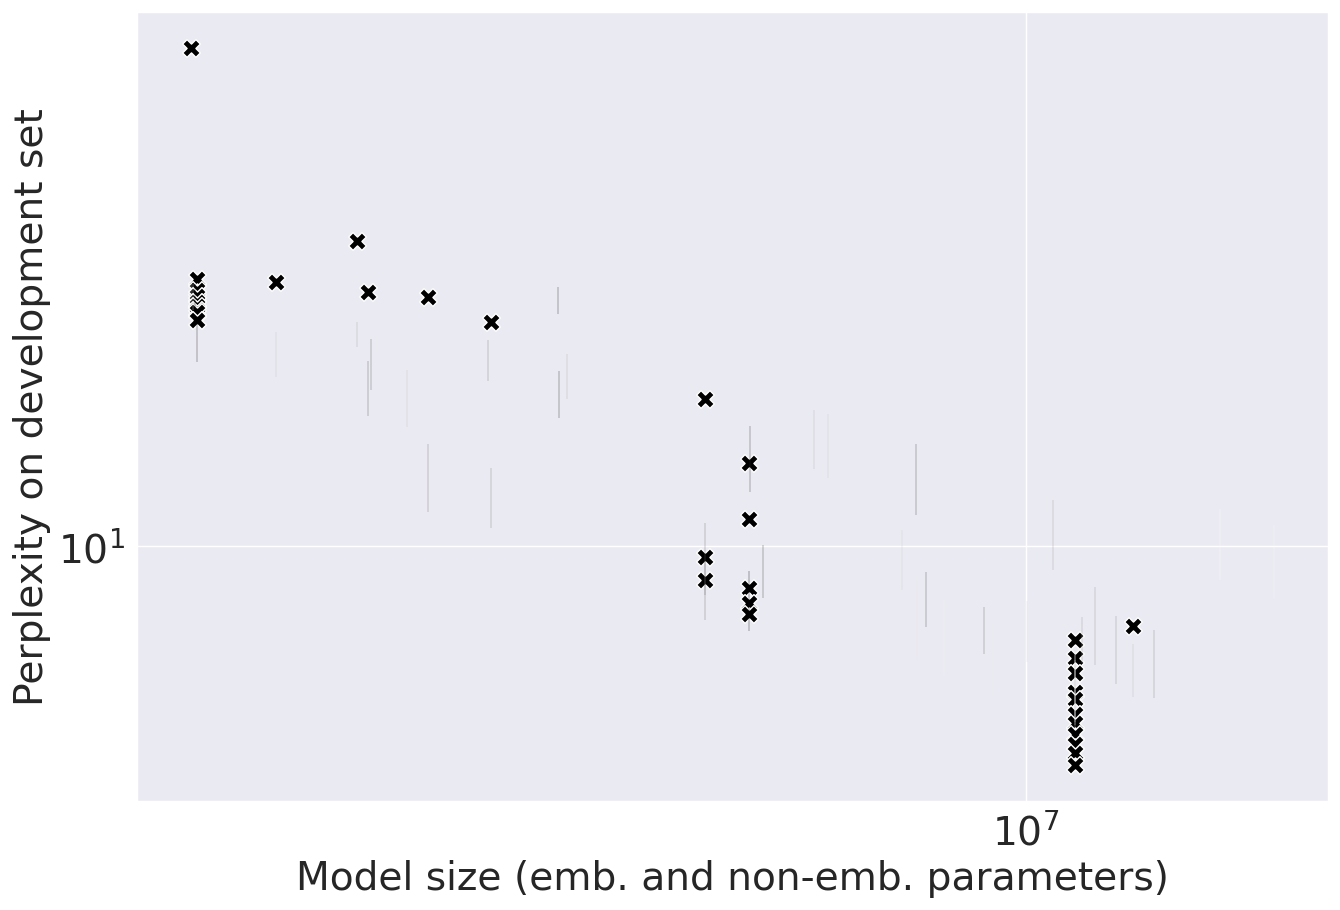

In [47]:
plt.rcParams.update({'font.size': 22})
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(12, 8), dpi=128)
#ax.set_ylim(10**7, 10**13)
#ax.set_xlim(10**15, 10**13)
ax.set(xscale="log", yscale="log")
sns.scatterplot(
    data=df_arg_min,
    x="Total parameters",
    y="eval/perplexity",
    s=100,
    #linewidth=0,
    marker="X",
    color="black",
    #lw=4,
    #alpha=0.7,
    #ax=ax, 
)
sns.lineplot(
    data=df_eval,
    x="Total parameters",
    y="eval/perplexity",
    hue="run_name",
    palette="Greys",
    #s=10,
    #linewidth=0,
    #marker="X",
    #color="black",
    #lw=4,
    alpha=0.15,
    #ax=ax, 
    legend=False,
)

plt.xlabel("Model size (emb. and non-emb. parameters)")
plt.ylabel("Perplexity on development set")
plt.savefig("./PLOTS/Parameters_vs_PPL_loglog.jpg")

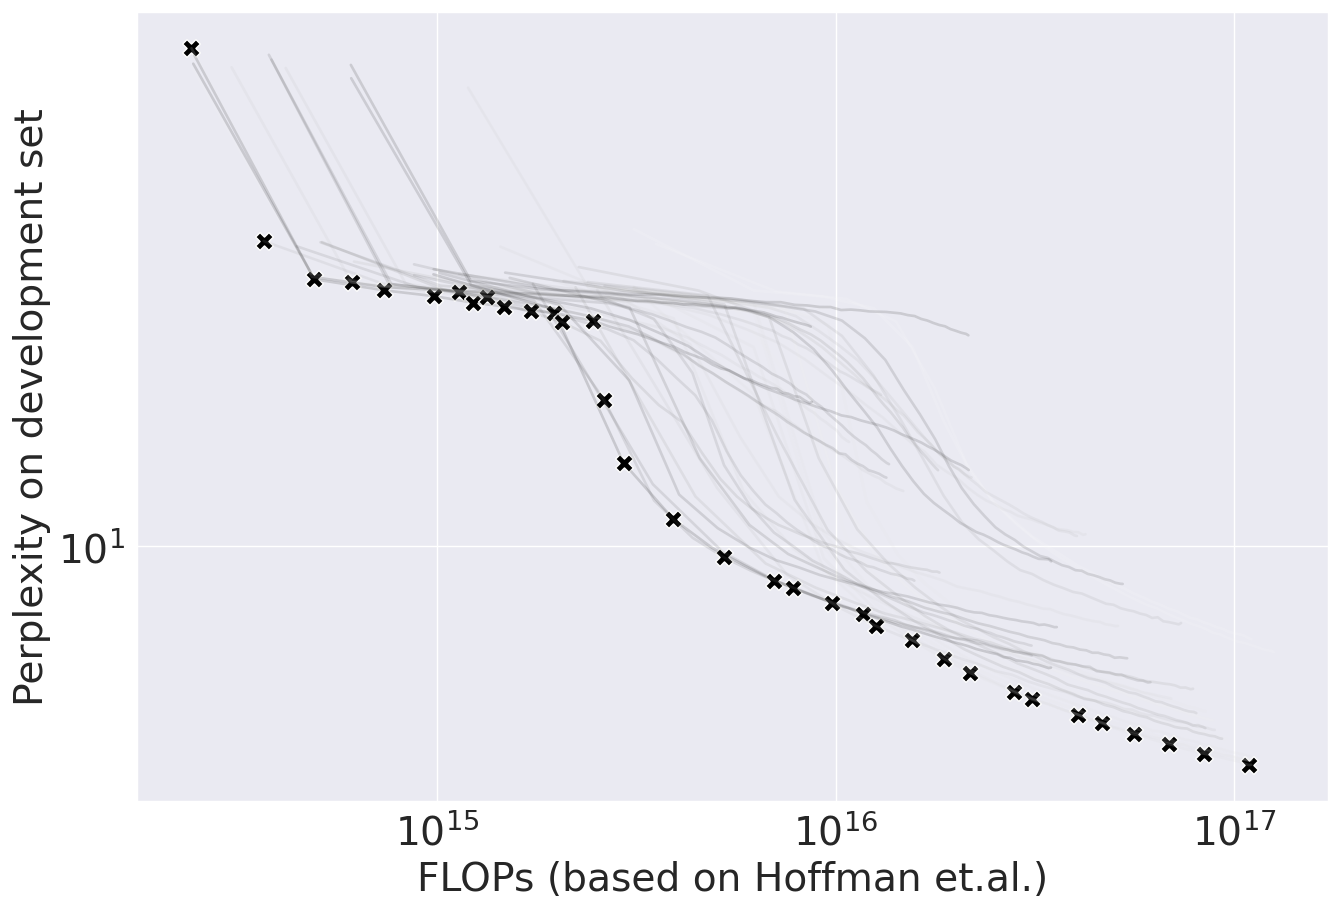

In [48]:
plt.rcParams.update({'font.size': 22})
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(12, 8), dpi=128)
#ax.set_ylim(10**7, 10**13)
#ax.set_xlim(10**15, 10**13)
ax.set(xscale="log", yscale="log")
sns.scatterplot(
    data=df_arg_min,
    x="FLOPS Hoffman total",
    y="eval/perplexity",
    s=100,
    #linewidth=0,
    marker="X",
    color="black",
    #lw=4,
    #alpha=0.7,
    #ax=ax, 
)
sns.lineplot(
    data=df_eval,
    x="FLOPS Hoffman total",
    y="eval/perplexity",
    hue="run_name",
    palette="Greys",
    #s=10,
    #linewidth=0,
    #marker="X",
    #color="black",
    #lw=4,
    alpha=0.15,
    #ax=ax, 
    legend=False,
)

plt.xlabel("FLOPs (based on Hoffman et.al.)")
plt.ylabel("Perplexity on development set")
plt.savefig("./PLOTS/FLOPs_vs_PPL_loglog.jpg")